In [36]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pylandau as pland
import ROOT
import sys


def Landau(x,a, MP,xi):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    return  C1 * C3

def Landgauss(x,a, MP, xi, b,eps):
    C1 = a/np.sqrt((2 * np.pi))
    C2 = np.exp(-((x-MP)-1)/xi)
    C3 = np.exp((-0.5 * (((x-MP)-1)/xi + C2 )))
    C4 = C1 * C3
    C5 = b * np.exp(-x/eps)
    return  C4 + C5

path = 'datahistogram_Imgs_1541_Sol_0.7_Elip_4.5.pkl'
path_All_Events = 'data_histogram_Imgs_500_Sol_0.7_Elip_2_All_Events.pkl'
path_StraCirc_Events = 'data_histogram_Imgs_500_Sol_0.7_Elip_2.5Straight_and_Circular.pkl'
path_Straight_events = 'data_histogram_Imgs_500_Sol_0.7_Elip_4.5Straight.pkl'

In [17]:
histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [18]:
data_raw_eV, events, muons_detected = data_histogram

data_raw_keV = []
for i in data_raw_eV:
    keV = i / 1000
    data_raw_keV.append(keV)

In [19]:
list_path = path.split('_')
window_name = 'histogram_Imgs_'+str(list_path[2])+'_Sol_'+str(list_path[4])+'_Elip_'+str(list_path[6][0:5])+'.pkl'
num_images = 'Imágenes analizadas: ' + str(list_path[2]) 
eventos_rectos = 'Muones Detectados: ' + str(muons_detected)

Los parámetros del ajuste son: Altura:  2988.41  EMP:  151.14  $\xi$:  41.021


(0.0, 2000.0)

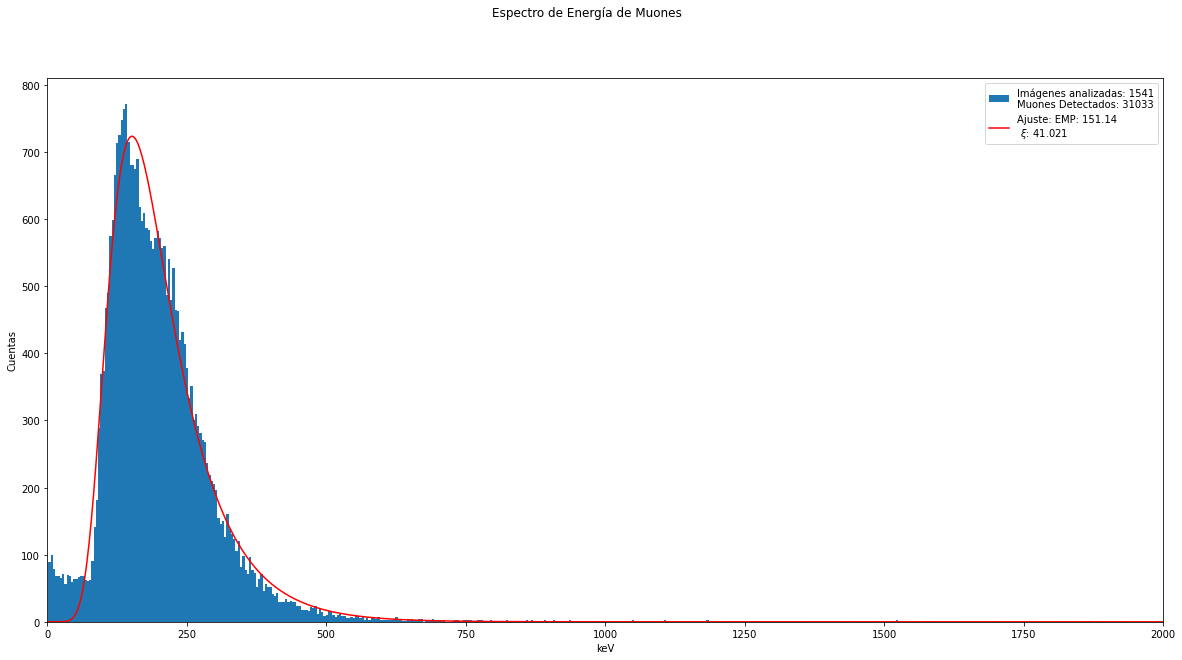

In [86]:
fig, axs = plt.subplots(1,1, figsize =[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones')
bin_heights, bin_borders, _ = axs.hist(data_raw_keV, bins = 5000, label= num_images + '\n' + eventos_rectos) 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
popt, _ = curve_fit(Landau, bin_centers, bin_heights)
print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
strAjuste = 'Ajuste: EMP: ' + str(round(popt[1],3)) + '\n' + r' $\xi$: ' + str(round(popt[2],3))

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
axs.plot(x_interval_for_fit, Landau(x_interval_for_fit,*popt),'r', label=strAjuste)

axs.legend(loc="upper right") 
axs.set_xlabel(r'keV')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 2000])  

array([2989.63738494,  151.69909182,   40.64343652,  121.93250242,
         36.20829748])

(0.0, 500.0)

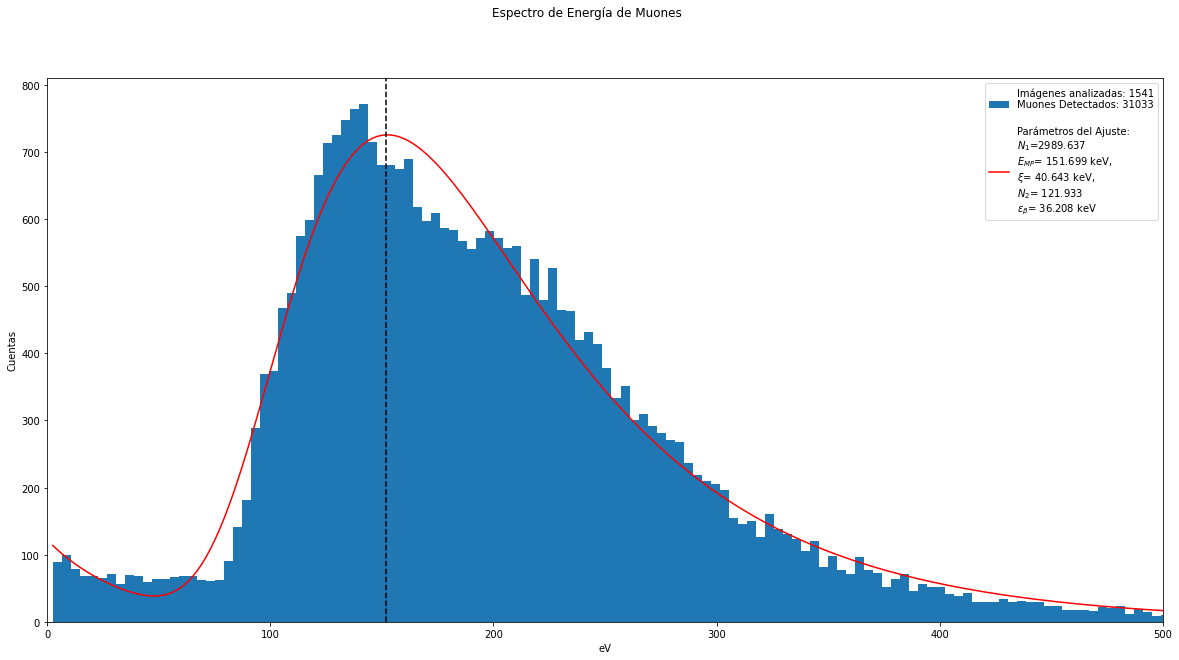

In [175]:
fig, axs = plt.subplots(1,1, figsize=[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones')
bin_heights, bin_borders, _ = axs.hist(data_raw_keV, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
popt_landgauss, _ = curve_fit(Landgauss, bin_centers, bin_heights)
# print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
display(popt_landgauss)
strAjuste = 'Parámetros del Ajuste: \n'+ \
    r'$N_1$=' + str(round(popt_landgauss[0],3)) + '\n' + \
    r'$E_{MP}$= ' + str(round(popt_landgauss[1],3)) + ' keV, \n' + \
    r'$\xi$= ' + str(round(popt_landgauss[2],3)) + ' keV, \n' + \
    r'$N_2$= ' + str(round(popt_landgauss[3],3)) + '\n' + \
    r'$\epsilon_{\beta}$= ' + str(round(popt_landgauss[4],3)) + ' keV'

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt_landgauss),'r', label=strAjuste)

# axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 3000, 190, 40, 90, 300),'r')

axs.axvline(x=popt_landgauss[1], color = 'k', ls = '--')

axs.legend(loc="upper right") 
# axs.set_yscale('log')
axs.set_xlabel(r'eV')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 500])  

(0.0, 1000.0)

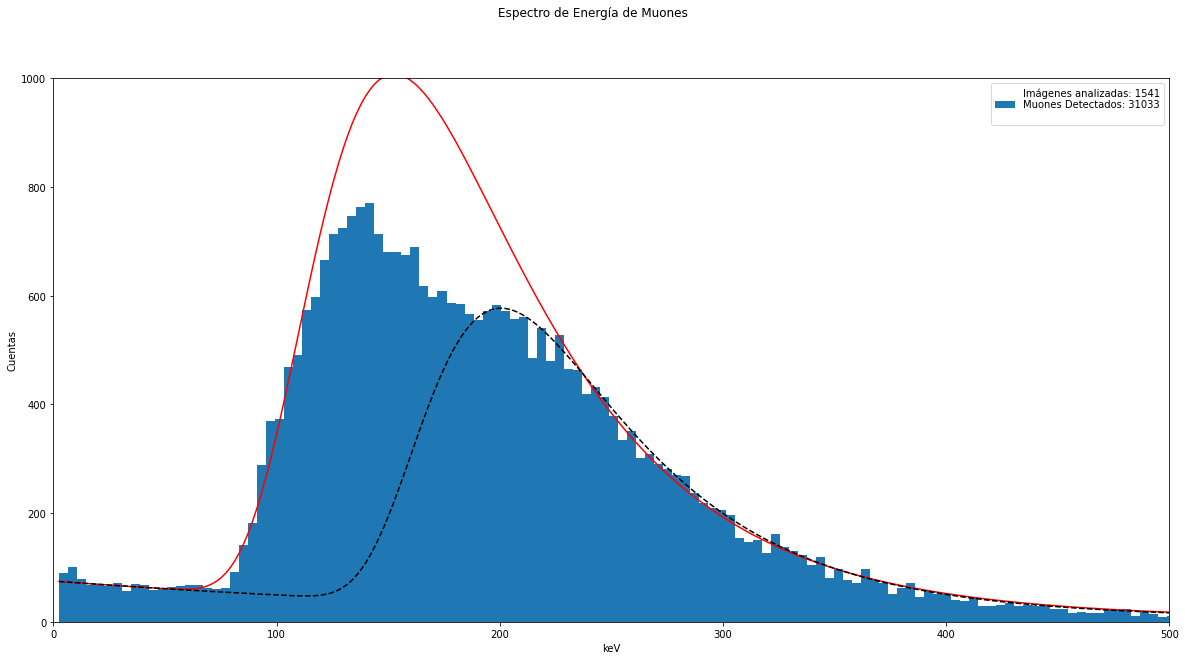

In [35]:
fig, axs = plt.subplots(1,1, figsize=[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones')
bin_heights, bin_borders, _ = axs.hist(data_raw_keV, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
# popt_landgauss, _ = curve_fit(Landgauss, bin_centers, bin_heights)
# # print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
# display(popt_landgauss)
# strAjuste = 'Parámetros del Ajuste: \n'+ \
#     r'$N_1$=' + str(round(popt_landgauss[0],3)) + '\n' + \
#     r'$E_{MP}$= ' + str(round(popt_landgauss[1],3)) + ' keV, \n' + \
#     r'$\xi$= ' + str(round(popt_landgauss[2],3)) + ' keV, \n' + \
#     r'$N_2$= ' + str(round(popt_landgauss[3],3)) + '\n' + \
#     r'$\epsilon_{\beta}$= ' + str(round(popt_landgauss[4],3)) + ' keV'

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
# axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt_landgauss),'r', label=strAjuste)

axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 4000, 152, 33, 75, 240),'r')
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 2250, 200, 31, 75, 240),'--k')

# axs.axvline(x=popt_landgauss[1], color = 'k', ls = '--')

axs.legend(loc="upper right") 
# axs.set_yscale('log')
axs.set_xlabel(r'keV')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 500])  
axs.set_ylim([0,1000])

In [33]:
data_raw_keV_truncados = []
for charge in data_raw_keV:
    if charge < 75 or 220 <= charge:
        data_raw_keV_truncados.append(charge)
         

array([1788.38486396,  244.33711528,   20.70962852,  117.10595348,
         49.06501241])

(0.0, 500.0)

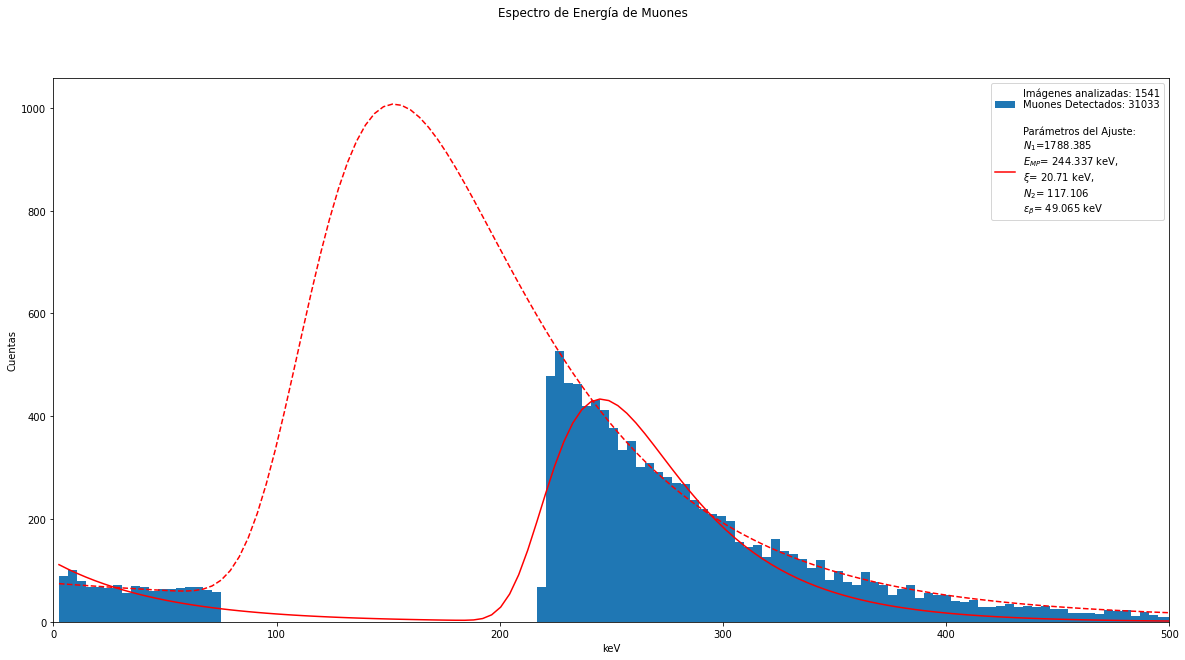

In [34]:
fig, axs = plt.subplots(1,1, figsize=[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones')
bin_heights, bin_borders, _ = axs.hist(data_raw_keV_truncados, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
popt_landgauss, _ = curve_fit(Landgauss, bin_centers, bin_heights)
# print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
display(popt_landgauss)
strAjuste = 'Parámetros del Ajuste: \n'+ \
    r'$N_1$=' + str(round(popt_landgauss[0],3)) + '\n' + \
    r'$E_{MP}$= ' + str(round(popt_landgauss[1],3)) + ' keV, \n' + \
    r'$\xi$= ' + str(round(popt_landgauss[2],3)) + ' keV, \n' + \
    r'$N_2$= ' + str(round(popt_landgauss[3],3)) + '\n' + \
    r'$\epsilon_{\beta}$= ' + str(round(popt_landgauss[4],3)) + ' keV'

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 5000)
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt_landgauss),'r', label=strAjuste)
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 4000, 152, 33, 75, 240),'--r')
# axs.hist(data_raw_keV, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
# axs.axvline(x=popt_landgauss[1], color = 'k', ls = '--')

axs.legend(loc="upper right") 
# axs.set_yscale('log')
axs.set_xlabel(r'keV')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 500])  

In [85]:
for elemento in range(0, len(popt)):
    print(popt[elemento], popt_landgauss[elemento])

2988.409508593345 2989.6373849351457
151.1395387379791 151.69909182260133
41.02070066504348 40.643436516943495


/tmp/ipykernel_22043/2889963288.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_landau = pland.landau(x)
/tmp/ipykernel_22043/2889963288.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_langaus = pland.langau(x)


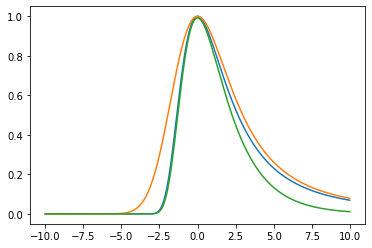

In [65]:
x = np.arange(-10, 10, 0.01)
y_landau = pland.landau(x)
y_langaus = pland.langau(x)
y_me_landau = Landau(x,4.1,-1,1)
plt.plot(x,y_landau)
plt.plot(x,y_langaus)
plt.plot(x,y_me_landau)
# plt.xlim(0,10000)

In [37]:
histogram_all = open(path_All_Events, 'rb')
data_All_histogram = pck.load(histogram_all)
histogram_all.close()

histogram_straight = open(path_Straight_events, 'rb')
data_straight_histogram = pck.load(histogram_straight)
histogram_straight.close()

histogram_strcir = open(path_StraCirc_Events, 'rb')
data_strcirc_histogram = pck.load(histogram_strcir)
histogram_strcir.close()


data_All_raw_eV = data_All_histogram
data_straight_raw_eV = data_straight_histogram
data_strcirc_raw_eV = data_strcirc_histogram

print(len(data_All_raw_eV))
# print(len(data_raw_eV))
data_All_raw_keV = []
data_straight_raw_keV = []
data_strcirc_raw_keV = []

for i in data_All_raw_eV:
    keV = i / 1000
    data_All_raw_keV.append(keV)
del data_All_raw_eV

for i in data_straight_raw_eV:
    keV = i / 1000
    data_straight_raw_keV.append(keV)
del data_straight_raw_eV

# for i in data_strcirc_raw_eV:
#     keV = i / 1000
#     data_strcirc_raw_eV.append(keV)

17621


In [43]:
for i in data_strcirc_raw_eV:
    keV = i / 1000
    data_strcirc_raw_keV.append(keV)

: 

Text(0.5, 0.98, 'Espectro de Energías')

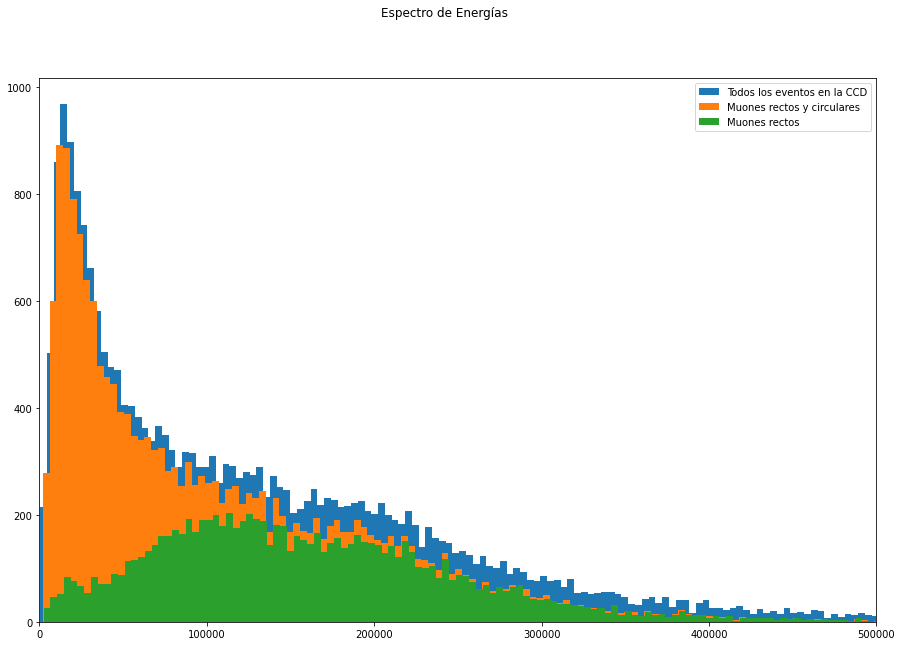

In [40]:
fig, axs = plt.subplots(figsize = [15,10])
axs.hist(data_All_raw_eV, bins=5000, label='Todos los eventos en la CCD')
axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
axs.hist(data_straight_raw_eV, bins=5000, label='Muones rectos')
axs.set_xlim([0,500000])
# axs.set_yscale('log')
# axs.set_xscale('log')
axs.legend()
fig.suptitle('Espectro de Energías')
# fig.legend()

In [39]:
histogram_all = open(path_All_Events, 'rb')
data_All_histogram = pck.load(histogram_all)
histogram_all.close()

histogram_straight = open(path_Straight_events, 'rb')
data_straight_histogram = pck.load(histogram_straight)
histogram_straight.close()

# histogram_strcir = open(path_StraCirc_Events, 'rb')
# data_strcirc_histogram = pck.load(histogram_strcir)
# histogram_strcir.close()

data_All_raw_eV = data_All_histogram
data_straight_raw_eV = data_straight_histogram
# data_strcirc_raw_eV = data_strcirc_histogram

Text(0.5, 0.98, 'Espectro de Energías')

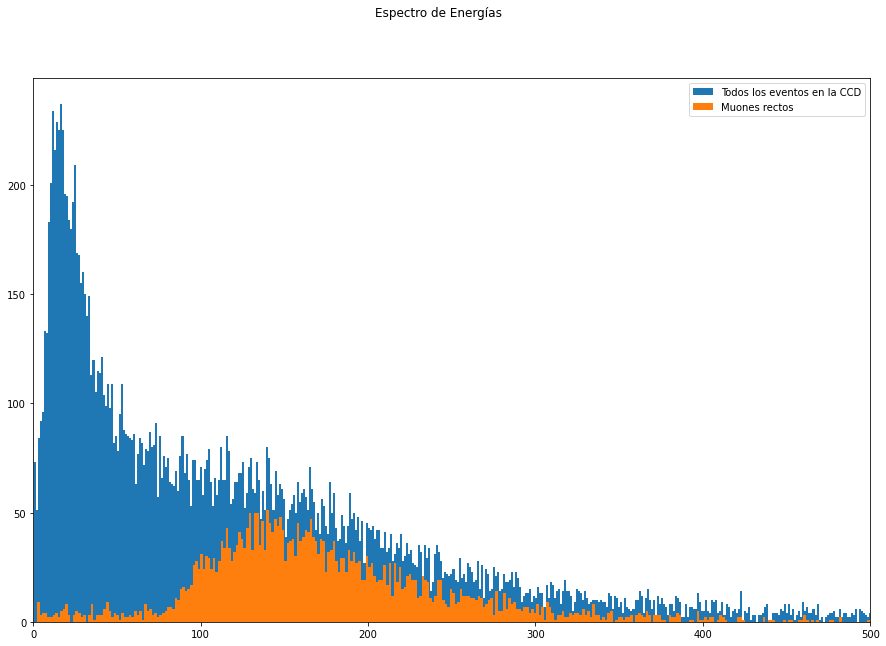

In [40]:
fig, axs = plt.subplots(figsize = [15,10])
axs.hist(data_All_raw_eV, bins=3000, label='Todos los eventos en la CCD')
# axs.hist(data_strcirc_raw_eV, bins=5000, label='Muones rectos y circulares')
axs.hist(data_straight_raw_eV, bins=1000, label='Muones rectos')
axs.set_xlim([0,500])
# axs.set_yscale('log')
# axs.set_xscale('log')
axs.legend()
fig.suptitle('Espectro de Energías')
# fig.legend()

(0.0, 500.0)

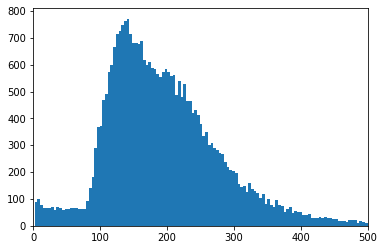

In [208]:
plt.hist(data_raw_keV, bins=5000)
plt.xlim([0,500])

array([2989.63738494,  151.69909182,   40.64343652,  121.93250242,
         36.20829748])

(0.0, 500.0)

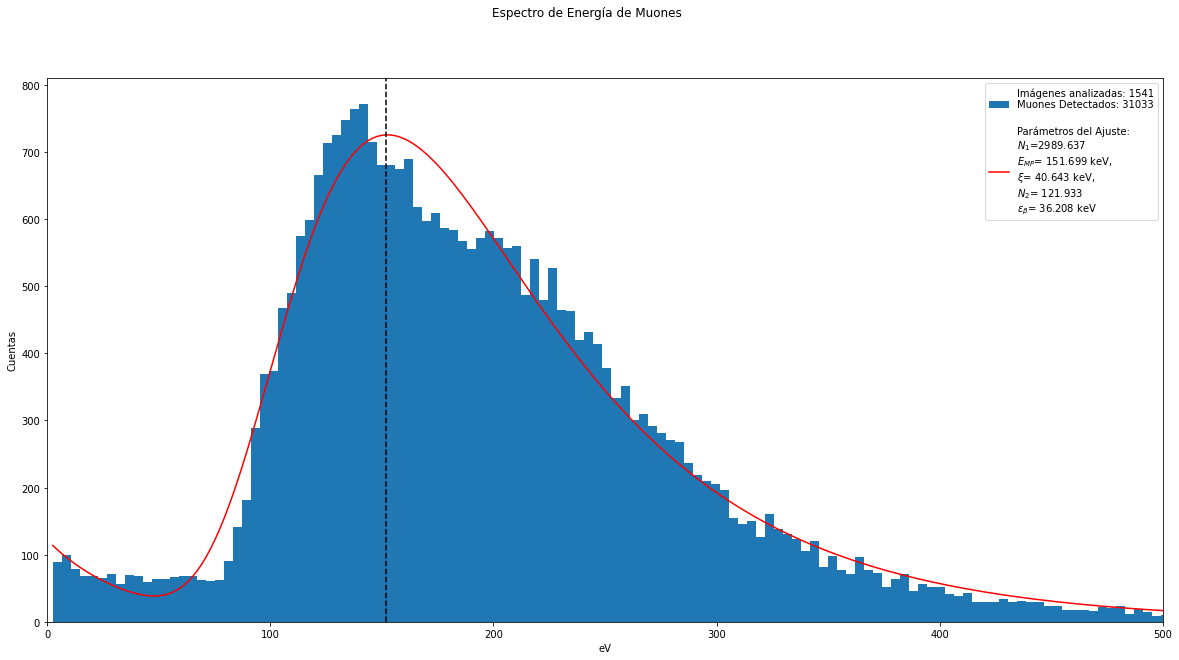

In [198]:
fig, axs = plt.subplots(1,1, figsize=[20,10])
fig.canvas.manager.set_window_title(window_name)

fig.suptitle('Espectro de Energía de Muones')
bin_heights, bin_borders, _ = axs.hist(data1_raw_keV, bins = 5000, label= num_images + '\n' + eventos_rectos + '\n') 
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2 

# popt, _ = curve_fit(Landau, bin_centers, bin_heights, p0=[50,10000,1000])
popt_landgauss, _ = curve_fit(Landgauss, bin_centers, bin_heights)
# print('Los parámetros del ajuste son: Altura: ', round(popt[0],3), ' EMP: ', round(popt[1],3), r' $\xi$: ', round(popt[2],3))
display(popt_landgauss)
strAjuste = 'Parámetros del Ajuste: \n'+ \
    r'$N_1$=' + str(round(popt_landgauss[0],3)) + '\n' + \
    r'$E_{MP}$= ' + str(round(popt_landgauss[1],3)) + ' keV, \n' + \
    r'$\xi$= ' + str(round(popt_landgauss[2],3)) + ' keV, \n' + \
    r'$N_2$= ' + str(round(popt_landgauss[3],3)) + '\n' + \
    r'$\epsilon_{\beta}$= ' + str(round(popt_landgauss[4],3)) + ' keV'

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit,*popt_landgauss),'r', label=strAjuste)

# axs.plot(x_interval_for_fit, Landgauss(x_interval_for_fit, 3000, 190, 40, 90, 300),'r')

axs.axvline(x=popt_landgauss[1], color = 'k', ls = '--')

axs.legend(loc="upper right") 
# axs.set_yscale('log')
axs.set_xlabel(r'eV')
axs.set_ylabel('Cuentas') 
axs.set_xlim([0, 500])  

In [79]:
# c1 = ROOT.TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
hpx = ROOT.TH1F( 'hpx', 'This is the px distribution', 100, -4, 4 )
for i in data_raw_eV:
    hpx.Fill(i)

hpx.DrawCopy()

Warning in <TROOT::Append>: Replacing existing TH1: hpx (Potential memory leak).
